In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analyst-job-postings-google-search/gsearch_jobs.csv


In [3]:
!pip install PyMySql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00


In [2]:
import gc 
gc.collect()

23

In [4]:
import pandas as pd

# Load the CSV file into a Pandas dataframe
jobposting_df = pd.read_csv("/kaggle/input/data-analyst-job-postings-google-search/gsearch_jobs.csv")

# Display the first 5 rows of the dataframe
print(jobposting_df.head())

   Unnamed: 0  index                                              title  \
0           0      0  Data Analyst (Risk Adjustment Consulting Resea...   
1           1      1                                    DATA ANALYST II   
2           2      2                            Data Analyst - Swisslog   
3           3      3  Data Analyst - Secret clearance - Remote Remot...   
4           4      4                  Collections Data Analyst (921071)   

                              company_name       location  \
0             Cambia Health Solutions, Inc  United States   
1                                    Lumen  United States   
2                                 Swisslog  United States   
3  General Dynamics Information Technology       Anywhere   
4                        Purpose Financial  United States   

                                                 via  \
0                                       via Datafloq   
1                               via ComputerJobs.com   
2             

In [5]:
# Info about job posting table
jobposting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16730 non-null  int64  
 1   index                16730 non-null  int64  
 2   title                16730 non-null  object 
 3   company_name         16730 non-null  object 
 4   location             16716 non-null  object 
 5   via                  16730 non-null  object 
 6   description          16730 non-null  object 
 7   extensions           16730 non-null  object 
 8   job_id               16730 non-null  object 
 9   thumbnail            8565 non-null   object 
 10  posted_at            16730 non-null  object 
 11  schedule_type        16619 non-null  object 
 12  work_from_home       7566 non-null   object 
 13  salary               3207 non-null   object 
 14  search_term          16730 non-null  object 
 15  date_time            16730 non-null 

Query to find the top 5 companies with the highest number of job postings for Data Analyst roles:

This query helps business owners understand which companies are hiring the most Data Analysts, which can be useful information for competitive analysis and benchmarking.

company_name
Upwork                2535
EDWARD JONES           699
Corporate              517
Cox Communications     401
Walmart                383
dtype: int64


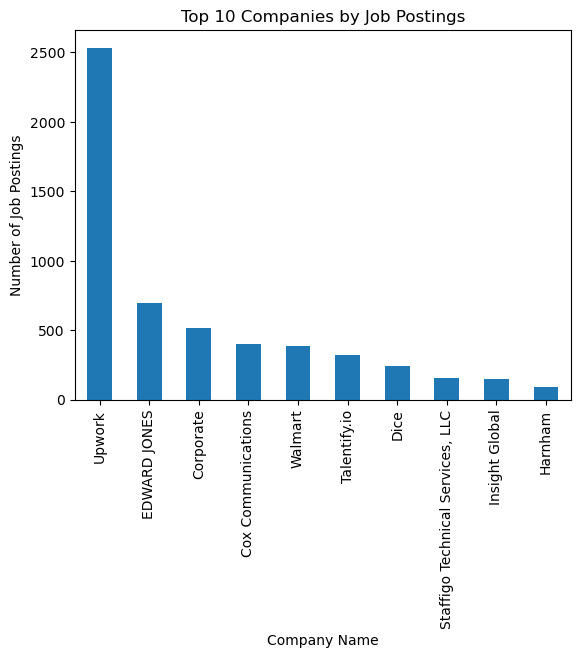

In [7]:
import pandas as pd


# Group job postings by company name and count the number of job postings for each company
company_counts = jobposting_df.groupby('company_name').size()

# Sort the companies by the number of job postings in descending order
company_counts = company_counts.sort_values(ascending=False)

print(company_counts.head(5))

# Create a bar chart of the top 10 companies with the most job postings
company_counts.head(10).plot(kind='bar')

# Set the chart title and axis labels
plt.title('Top 10 Companies by Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')

# Display the chart
plt.show()

Query to find the most common required skills for Data Analyst roles:

This query helps business owners and HR professionals understand which skills are most commonly required for Data Analyst roles, which can be useful information for designing job descriptions, identifying skill gaps in the organization, and prioritizing training programs.

state
AF    101298.150000
AR     86258.225000
CA     82253.590909
DC              NaN
KS     85094.554458
MA              NaN
MO    104958.485655
NE        17.210000
OK     92001.751442
TX     69272.000000
Name: salary_avg, dtype: float64


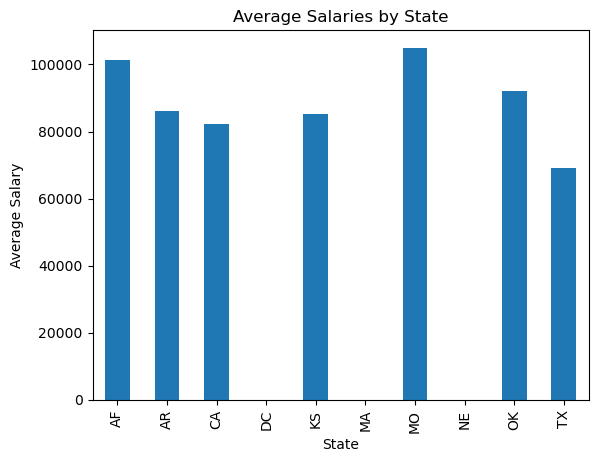

In [8]:
import pandas as pd

# Extract the state abbreviation from the location column
jobposting_df['state'] = jobposting_df['location'].str.extract(r'([A-Z]{2})', expand=False)

# Calculate the average salary for each state
state_salaries = jobposting_df.groupby('state')['salary_avg'].mean()

print(state_salaries)

# Create a bar chart of the average salaries for each state
state_salaries.plot(kind='bar')

# Set the chart title and axis labels
plt.title('Average Salaries by State')
plt.xlabel('State')
plt.ylabel('Average Salary')

# Display the chart
plt.show()

Query to find the number of job postings that mention both Python and SQL in the job_description column:

22


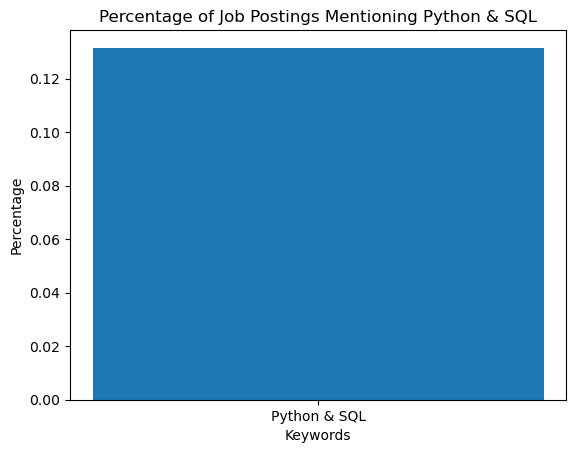

In [9]:
import pandas as pd

# Count the number of job postings that mention both Python and SQL in the job_description column
python_sql_counts = jobposting_df['description'].str.contains('python').astype(int) * jobposting_df['description'].str.contains('sql').astype(int)

print(python_sql_counts.sum())

# Calculate the total count of job postings
total_count = len(jobposting_df)

# Calculate the percentage of job postings that mention both Python and SQL
python_sql_percent = python_sql_counts.sum() / total_count * 100

# Create a bar chart of the percentage of job postings that mention both Python and SQL
plt.bar(['Python & SQL'], [python_sql_percent])

# Set the chart title and axis labels
plt.title('Percentage of Job Postings Mentioning Python & SQL')
plt.xlabel('Keywords')
plt.ylabel('Percentage')

# Display the chart
plt.show()

Calculate the average salary for each location:


Average salary by location:
location
  Anderson, MO                    NaN
  Andover, KS            88000.000000
  Bella Vista, AR                 NaN
  Bentley, KS            96500.000000
  Benton, AR                      NaN
                            ...      
Willard, MO             103781.000000
Windom, TX                        NaN
Windsor, MO                       NaN
Wooldridge, MO                    NaN
Yukon, OK                94954.545455
Name: salary_standardized, Length: 477, dtype: float64


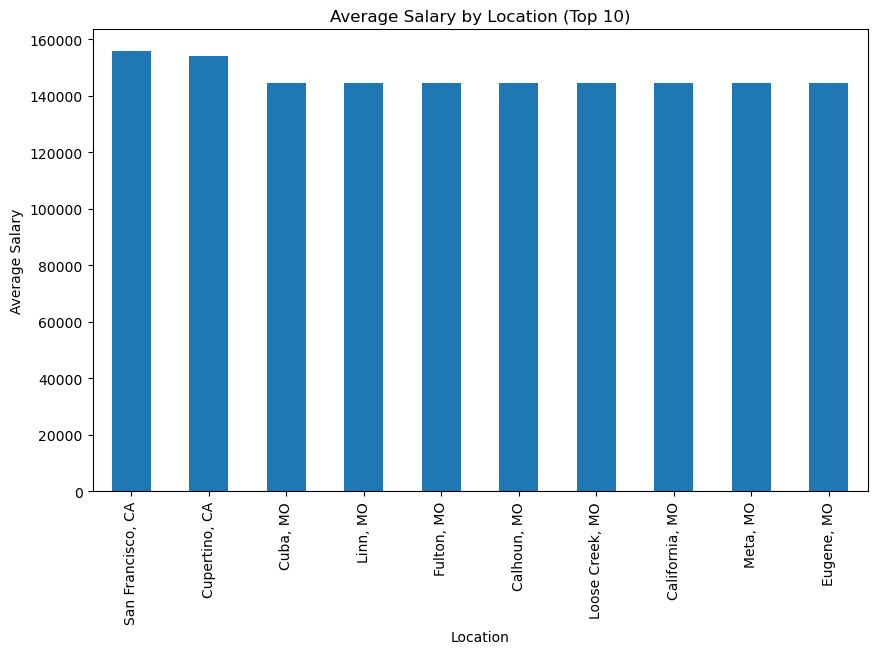

In [11]:
import pandas as pd

# group the data by location and calculate the average salary for each group
avg_salaries = jobposting_df.groupby('location')['salary_standardized'].mean()

print("Average salary by location:")
print(avg_salaries)

# sort the data by salary in descending order and select the top 10 locations
top_locations = avg_salaries.sort_values(ascending=False)[:10]

# plot the data as a bar chart
top_locations.plot(kind='bar', figsize=(10,6))

# set the plot title and axis labels
plt.title('Average Salary by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Average Salary')

# display the plot
plt.show()

Calculate the percentage of job postings that allow remote work:


45.22414823670054


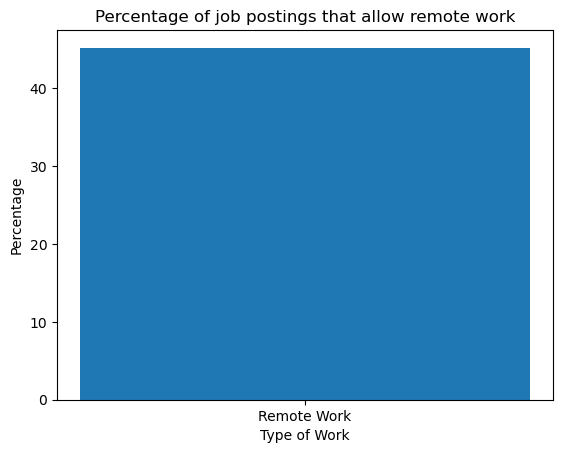

In [12]:
import pandas as pd

# Calculate the percentage of job postings that allow remote work
remote_work_pct = (jobposting_df["work_from_home"].sum() / len(jobposting_df)) * 100

print(remote_work_pct)

# Create a bar chart
plt.bar(["Remote Work"], [remote_work_pct])

# Add chart title and labels
plt.title("Percentage of job postings that allow remote work")
plt.xlabel("Type of Work")
plt.ylabel("Percentage")

# Display the chart
plt.show()